In [192]:
import numpy as np
import arviz as az
from pathlib import Path
import json_numpy
import pandas as pd
import matplotlib.pyplot as plt

In [322]:
res_args = {}
res_data = {}
for p in Path('models').glob('*args.json'):
    token = p.name.split('.')[0]
    with open(p, 'r') as f:
        dct = json_numpy.load(f)
    res_args[token] = dct
    
    p2 = Path('models') / f"{token}.data.json"
    with open(p2, 'r') as f:
        dct = json_numpy.load(f)
    res_data[token] = dct
pd.DataFrame(res_args).T

,model_hash,data_hash,model_source,utc
C52ZBA,e06d16dfaa7251fbeaea38aa4ece6a5f241429a7d478c7...,13083f90a5f5670621109e45161f0de0077122452a4215...,"def model_2d(\n beds,\n bathrooms,\n ...",2022-08-13 10:09:05
6XCMKw,e06d16dfaa7251fbeaea38aa4ece6a5f241429a7d478c7...,f4a802a8f4ab63b1219563a479bf7c3c60d1833533fde9...,"def model_2d(\n beds,\n bathrooms,\n ...",2022-08-13 11:44:34
O0bXtA,e06d16dfaa7251fbeaea38aa4ece6a5f241429a7d478c7...,649a00da69c07c70cc95a8700abaf092aeeef8796530b5...,"def model_2d(\n beds,\n bathrooms,\n ...",2022-08-13 08:25:29
vapCNA,e06d16dfaa7251fbeaea38aa4ece6a5f241429a7d478c7...,3a34a039f2e4c0d89e9b6e8cf383e5e6c828c33eafe6b7...,"def model_2d(\n beds,\n bathrooms,\n ...",2022-08-13 08:55:29
OwnvlQ,e06d16dfaa7251fbeaea38aa4ece6a5f241429a7d478c7...,e5fcf702023eda5f090a3e54e790a72e2a95e4480b0273...,"def model_2d(\n beds,\n bathrooms,\n ...",2022-08-13 08:14:57
hCrxiQ,e06d16dfaa7251fbeaea38aa4ece6a5f241429a7d478c7...,67b0c52e87edf2e93a906080ce3adffd046d56dc3625d7...,"def model_2d(\n beds,\n bathrooms,\n ...",2022-08-13 08:34:19
H_COgw,b3e7577f3f2b92f65ac921dbaa47fc3f7d29af47d92b20...,30d0097c4ca70fc1bcc88329fc07b9150e875cb4f3c997...,"def model_orig(\n beds,\n bathrooms,\n ...",2022-08-13 08:12:06
_MkKAA,e06d16dfaa7251fbeaea38aa4ece6a5f241429a7d478c7...,f5959356d1d3fea5482107f7acfe624fe78c7009b639e6...,"def model_2d(\n beds,\n bathrooms,\n ...",2022-08-13 08:20:49


In [323]:
pd.DataFrame(res_data).T['M']

C52ZBA     16
6XCMKw     18
O0bXtA      5
vapCNA     12
OwnvlQ      4
hCrxiQ      8
H_COgw    NaN
_MkKAA      3
Name: M, dtype: object

In [324]:
del idatas
idatas = {token:az.from_netcdf(f'models/{token}.cdf') for token in res_args.keys()}

In [325]:
az.compare(idatas).round(3)

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
6XCMKw,0,-965.867,127.206,0.000,0.922,80.573,0.000,False,log
C52ZBA,1,-1001.049,119.506,35.182,0.000,80.373,6.351,False,log
vapCNA,2,-1102.350,91.453,136.483,0.000,80.183,16.428,False,log
hCrxiQ,3,-1297.188,81.061,331.321,0.000,80.058,27.807,False,log
O0bXtA,4,-1479.457,52.314,513.590,0.019,80.345,35.164,False,log
H_COgw,5,-1492.276,56.955,526.409,0.043,79.635,34.910,False,log
OwnvlQ,6,-1513.570,47.155,547.703,0.010,80.272,36.211,False,log
_MkKAA,7,-1673.009,41.682,707.142,0.006,80.086,40.425,False,log


In [412]:
idata = idatas['vapCNA']
az.summary(idata, var_names=['a', 'scale', 'beta_baths', 'beta_beds', 'beta_is_new_home', 'df', 'alpha', 'rho', 'beta'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,-0.628,0.086,-0.790,-0.474,0.002,0.001,2798.0,2698.0,1.0
scale,0.205,0.004,0.198,0.212,0.000,0.000,6037.0,2877.0,1.0
beta_baths,0.184,0.006,0.172,0.195,0.000,0.000,7755.0,3083.0,1.0
beta_beds,0.218,0.005,0.209,0.228,0.000,0.000,7503.0,3238.0,1.0
beta_is_new_home,0.166,0.011,0.143,0.186,0.000,0.000,9371.0,2745.0,1.0
...,...,...,...,...,...,...,...,...,...
beta[139],-1.118,0.654,-2.289,0.184,0.008,0.007,6323.0,3011.0,1.0
beta[140],-2.074,0.647,-3.289,-0.893,0.008,0.006,5876.0,3138.0,1.0
beta[141],-1.148,0.596,-2.268,-0.016,0.008,0.006,5334.0,3416.0,1.0
beta[142],-1.420,0.547,-2.394,-0.341,0.007,0.006,5602.0,3205.0,1.0


In [413]:
import sample
import importlib
importlib.reload(sample)
import numpyro
import jax.random as jrnd

In [414]:
data = sample.get_data()
data.keys()

dict_keys(['dims', 'coords', 'observed', 'data'])

In [415]:
with numpyro.handlers.seed(rng_seed=4):
    trace = numpyro.handlers.trace(sample.model_just_2d).get_trace(G=data['data']['G'], M=18, L=1.5)
print( numpyro.util.format_shapes(trace) )

Trace Shapes:      
 Param Sites:      
Sample Sites:      
   alpha dist     |
        value     |
     rho dist     |
        value     |
 plate_ plate 324 |
    beta dist 324 |
        value 324 |


In [416]:
samples = {key:idata.posterior[key].values for key in ['alpha', 'rho', 'beta']}
samples = {key:value.reshape(4000) if value.ndim==2 else value.reshape(4000, -1) for key, value in samples.items()}

In [417]:
xx1_test, xx2_test = np.meshgrid(np.linspace(-1, 1, 101), np.linspace(-1, 1, 101))
G_test = np.c_[xx1_test.ravel(), xx2_test.ravel()]
ppc = numpyro.infer.Predictive(sample.model_just_2d, samples)(jrnd.PRNGKey(4), G=G_test, M=12, L=1.5)['f']

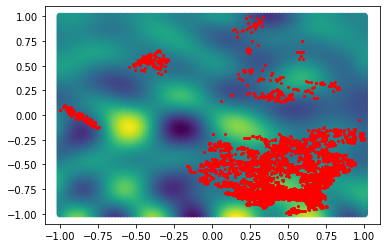

In [418]:
plt.scatter(xx1_test, xx2_test, c=ppc.mean(0));
plt.scatter(data['data']['G'][:, 0], data['data']['G'][:, 1], c='red', s=4);

In [419]:
data['data']['G'].mean(0)

array([ 0.39364095, -0.51169158])

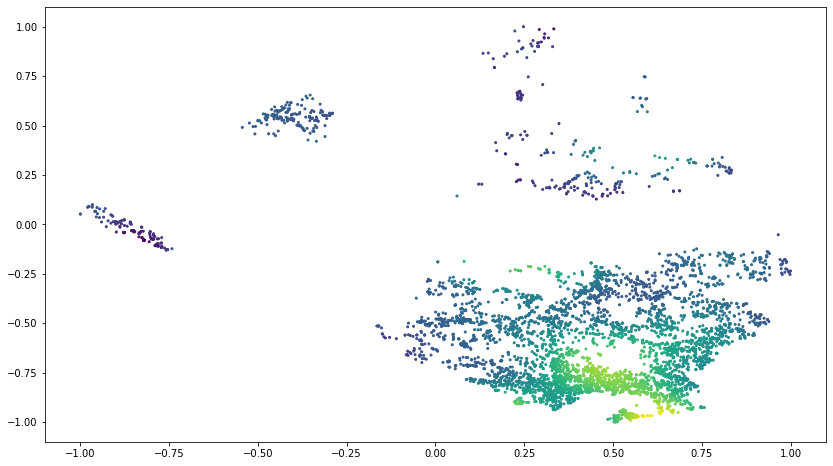

In [420]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.scatter(data['data']['G'][:, 0], data['data']['G'][:, 1], c=idata.posterior['f'].mean(('chain', 'draw')).values, s=4);

In [335]:
idata.posterior['f'].mean(('chain', 'draw')).values.argmax()

4936

In [336]:
idata.posterior['f'].mean(('chain', 'draw')).values[4936], data['data']['G'][4936, :]

(0.9716034989672567, array([ 0.60349777, -0.96787342]))

In [382]:
data['coords']['postcodes'][19]

'NW3'

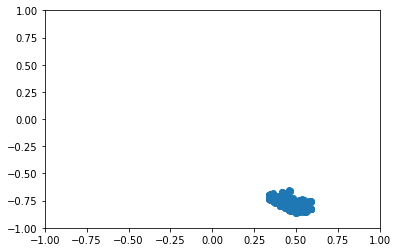

In [383]:
mask = data['data']['postcode_idx']==19
plt.scatter( data['data']['G'][mask, 0], data['data']['G'][mask, 1] );
ax = plt.gca()
ax.set(xlim=(-1, 1), ylim=(-1, 1));

In [373]:
data['data']['postcode_idx'].size

5700

In [374]:
np.ones(5700).dot( np.eye(26)[data['data']['postcode_idx']] )

array([186.,  42.,  75., 162., 165., 145., 182., 124., 145., 167., 176.,
       122., 147., 192., 176., 256., 437., 189., 455., 547., 192., 179.,
       529., 234., 343., 133.])

In [378]:
pd.Series( idata.posterior['f'].mean(('chain', 'draw')).values.dot( np.eye(26)[data['data']['postcode_idx']] ) / np.ones(5700).dot( np.eye(26)[data['data']['postcode_idx']] ), index=data['coords']['postcodes'] ).sort_values()

WD17   -0.462980
AL8    -0.377254
AL9    -0.246411
EN6    -0.245100
AL1    -0.198147
NW9    -0.170455
N11    -0.144441
N21    -0.121608
N14    -0.098498
N22    -0.092158
N12    -0.091716
NW4    -0.061862
NW7    -0.030794
N3      0.021656
N20     0.022473
NW2     0.058058
N10     0.088554
N8      0.099123
N2      0.101865
N19     0.130870
NW11    0.229655
NW6     0.277451
NW5     0.304029
N6      0.314050
NW1     0.545285
NW3     0.607941
dtype: float64

In [388]:
df_f = pd.DataFrame({'f': idata.posterior['f'].mean(('chain', 'draw')).values, 'postcode': data['coords']['postcodes'][data['data']['postcode_idx']]})
df_f

,f,postcode
0,0.717263,NW3
1,0.429687,NW3
2,-0.079191,N14
3,0.293744,NW5
4,-0.027975,NW7
...,...,...
5695,0.543927,NW3
5696,0.711737,NW3
5697,0.355390,NW6
5698,-0.045148,N8


In [398]:
df_f.groupby('postcode').agg({'f': ['mean', 'min', 'max', 'count', ]}).assign(rng=lambda x:x[('f', 'max')] - x[('f', 'min')]).round(2)

f                     rng
          mean   min   max count      
postcode                              
AL1      -0.20 -0.38  0.00   186  0.39
AL8      -0.38 -0.59 -0.28    42  0.31
AL9      -0.25 -0.45  0.19    75  0.63
EN6      -0.25 -0.48  0.28   162  0.75
N10       0.09 -0.20  0.28   165  0.48
N11      -0.14 -0.23  0.02   145  0.25
N12      -0.09 -0.28  0.10   182  0.37
N14      -0.10 -0.23  0.07   124  0.30
N19       0.13 -0.00  0.29   145  0.30
N2        0.10 -0.28  0.64   167  0.92
N20       0.02 -0.22  0.72   176  0.94
N21      -0.12 -0.37  0.09   122  0.46
N22      -0.09 -0.22  0.14   147  0.36
N3        0.02 -0.25  0.10   192  0.36
N6        0.31  0.18  0.65   176  0.46
N8        0.10 -0.07  0.25   256  0.32
NW1       0.55  0.21  0.97   437  0.76
NW11      0.23 -0.08  0.67   189  0.75
NW2       0.06 -0.26  0.49   455  0.75
NW3       0.61  0.38  0.88   547  0.50
NW4      -0.06 -0.14  0.01   192  0.15
NW5       0.30  0.20  0.49   179  0.29
NW6       0.28  0.13  0.57   529  0.44
NW7      -0.03 -0.32  0.30   234  0.62
NW9      -0.17 -0.39 -0.10   343  0.29
WD17     -0.46 -0.75 -0.03   133  0.71

In [399]:
import utils_data

In [402]:
df = utils_data.get_property_data()
df.head()

,isAuthenticated,propertyData.status.published,propertyData.status.archived,propertyData.text.description,propertyData.text.propertyPhrase,propertyData.text.disclaimer,propertyData.text.guidePriceDisclaimer,propertyData.text.reservePriceDisclaimer,propertyData.text.staticMapDisclaimerText,propertyData.text.newHomesBrochureDisclaimer,...,analyticsInfo.analyticsProperty.propertyType,analyticsInfo.analyticsProperty.retirement,analyticsInfo.analyticsProperty.selectedCurrency,analyticsInfo.analyticsProperty.selectedPrice,analyticsInfo.analyticsProperty.soldSTC,analyticsInfo.analyticsProperty.videoProvider,analyticsInfo.analyticsProperty.viewType,analyticsInfo.analyticsProperty.customUri,propertyData.streetView,postcode_head
propertyData.id,,,,,,,,,,,,,,,,,,,,,
124460603,False,True,False,An exceptional two double bedroom 2 bathroom t...,2 bedroom apartment,<b>Disclaimer</b> - Property reference HAM2202...,None,None,"Map data ©<a href=""http://www.openstreetmap.or...",Please note that Rightmove will send the above...,...,Flats / Apartments,False,None,None,False,No Video,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,NW3
121402754,False,True,False,<br />A bright second-floor maisonette on Finc...,1 bedroom apartment,<b>Disclaimer</b> - Property reference OPVH000...,None,None,"Map data ©<a href=""http://www.openstreetmap.or...",Please note that Rightmove will send the above...,...,Flats / Apartments,False,None,None,False,External Link,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,NW3
85479621,False,True,False,A well presented and rarely available four bed...,4 bedroom end of terrace house,<b>Disclaimer</b> - Property reference 2265742...,None,None,"Map data ©<a href=""http://www.openstreetmap.or...",Please note that Rightmove will send the above...,...,Houses,False,None,None,False,No Video,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,N14
121653137,False,True,False,This spacious home features a south facing rec...,3 bedroom ground floor flat,<b>Disclaimer</b> - Property reference uo8yoti...,None,None,"Map data ©<a href=""http://www.openstreetmap.or...",Please note that Rightmove will send the above...,...,Flats / Apartments,False,None,None,False,No Video,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,NW5
111674723,False,True,False,A beautifully presented period conversion with...,2 bedroom flat,<b>Disclaimer</b> - Property reference ABAC_01...,None,None,"Map data ©<a href=""http://www.openstreetmap.or...",Please note that Rightmove will send the above...,...,Flats / Apartments,False,None,None,False,Embedded,Current,https://www.rightmove.co.uk/property-for-sale/...,NaN,NW7


In [406]:
data['data']['G'][2431, :]

array([ 0.26823529, -0.21425315])

In [411]:
df.iloc[4513]

isAuthenticated                                                                              False
propertyData.status.published                                                                 True
propertyData.status.archived                                                                 False
propertyData.text.description                    A delightful one bedroom flat set on the top f...
propertyData.text.propertyPhrase                                                    1 bedroom flat
                                                                       ...                        
analyticsInfo.analyticsProperty.videoProvider                                             No Video
analyticsInfo.analyticsProperty.viewType                                                   Current
analyticsInfo.analyticsProperty.customUri        https://www.rightmove.co.uk/property-for-sale/...
propertyData.streetView                                                                        NaN
postcode_h

In [421]:
from scipy import spatial

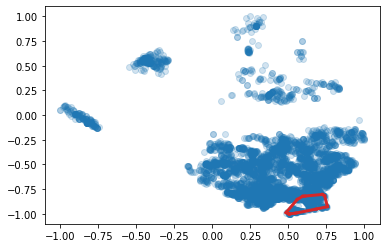

In [476]:
G = data['data']['G']

mask = data['data']['postcode_idx']==16
hull = spatial.ConvexHull(G[mask, :])

plt.scatter(G[:, 0], G[:, 1], alpha=0.2);
for simplex in hull.simplices:
    plt.plot(G[mask][simplex, 0], G[mask][simplex, 1], color='C3', lw=3.);